<a href="https://colab.research.google.com/github/pemba007/cluster-ml/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
# !pip install fuzzy-c-means

In [112]:
# Ignoring the warning

import warnings
warnings.filterwarnings("ignore")

In [113]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
# Reading dataset
df = pd.read_csv('./student-record.csv', names=['First_exam', 'Second_exam', 'Admission'])

In [115]:
df.head

<bound method NDFrame.head of     First_exam  Second_exam  Admission
0      34.6237      78.0247          0
1      30.2867      43.8950          0
2      35.8474      72.9022          0
3      45.0833      56.3164          0
4      95.8616      38.2253          0
..         ...          ...        ...
95     67.3193      66.5894          1
96     57.2387      59.5143          1
97     80.3668      90.9601          1
98     68.4685      85.5943          1
99     75.4777      90.4245          1

[100 rows x 3 columns]>

In [116]:
# Checking data shape
df.shape

(100, 3)

# Preprocessing

In [117]:
# Checking skewness
df.skew()

First_exam    -0.037111
Second_exam    0.054664
Admission     -0.414492
dtype: float64

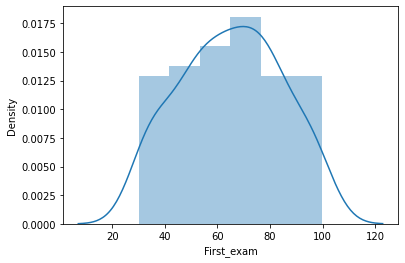

In [118]:
# Checking dataset distribution
sns.distplot(df['First_exam'])

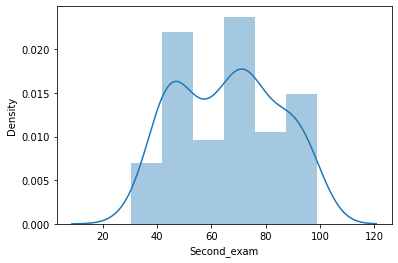

In [119]:
# Distribution of second_exam
sns.distplot(df['Second_exam'])

In [120]:
# Removing the admission feature because clustering is a unsupervised learning

y = df['Admission']
df.drop(columns=['Admission'], inplace = True)

In [121]:
df

,First_exam,Second_exam
0,34.6237,78.0247
1,30.2867,43.8950
2,35.8474,72.9022
3,45.0833,56.3164
4,95.8616,38.2253
...,...,...
95,67.3193,66.5894
96,57.2387,59.5143
97,80.3668,90.9601
98,68.4685,85.5943


In [122]:
# Normalizing the features First_exam and Second_exam

from sklearn.preprocessing import Normalizer

df = Normalizer().fit_transform(df)

# Training model

## Kmeans

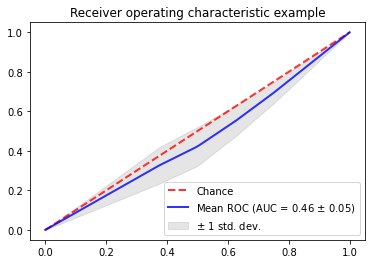

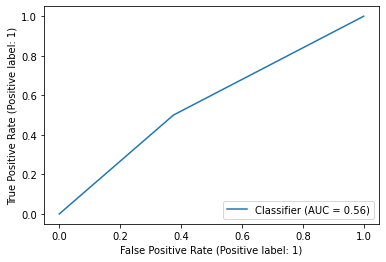

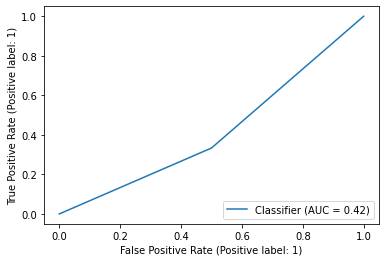

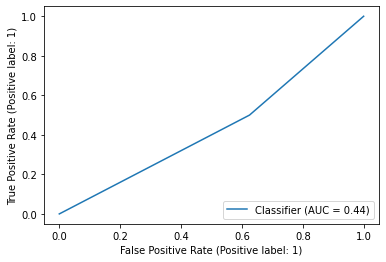

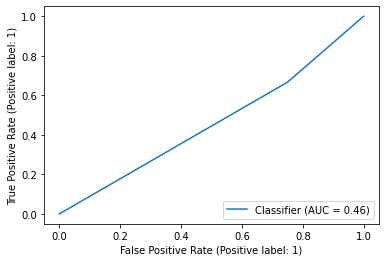

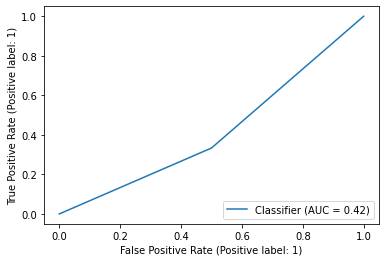

In [123]:
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, RocCurveDisplay, classification_report, auc, f1_score, multilabel_confusion_matrix,roc_curve

# Stritified KFold implementation
skf = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

for k, (train_index, test_index) in enumerate(skf.split(df, y)):
    X_train, X_test = df[train_index], df[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Training K means
    kmeans = KMeans(n_clusters=2).fit(X_train)

    # Predicting classes
    y_pred = kmeans.predict(X_test)

    # viz = RocCurveDisplay.from_estimator(
    #     kmeans,
    #     X_test,
    #     y_test,
    #     name="ROC fold {}".format(k),
    #     alpha=0.3,
    #     lw=1,
    #     ax=ax,
    # )
    viz = RocCurveDisplay.from_predictions(y_test, y_pred)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()